# Spectral calculations on Multi Axis data

In this notebook, we check that functions of _spectral are working as expected.

## Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.signal import chirp
from caits import visualization as vis
from caits.fe import (
    spectral_std,
    spectral_spread,
    spectral_values,
    spectral_bandwidth,
    spectral_centroid,
    spectral_decrease,
    spectral_flatness,
    spectral_kurtosis,
    spectral_skewness,
    spectral_slope,
    spectral_rolloff,
    underlying_spectral,
    power_spectral_density
)


## Step 2: Initialize data

In [2]:
# Parameters
fs = 200  # Sample rate (Hz)
duration = 2  # seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
n_samples = len(t)

# Signals
sine_5hz = np.sin(2 * np.pi * 5 * t)
sine_40hz = np.sin(2 * np.pi * 40 * t)
noise = np.random.randn(n_samples)
chirp_5_50 = chirp(t, f0=5, f1=50, t1=duration, method='linear')
constant = np.ones_like(t)
two_tone = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 40 * t)
decay_sine = (1 - t / duration) * np.sin(2 * np.pi * 5 * t)
impulse = np.zeros_like(t)
impulse[10] = 1  # single spike

# Stack into (samples, signals)
data = np.stack([
    sine_5hz,
    sine_40hz,
    noise,
    chirp_5_50,
    constant,
    two_tone,
    decay_sine,
    impulse
], axis=-1)

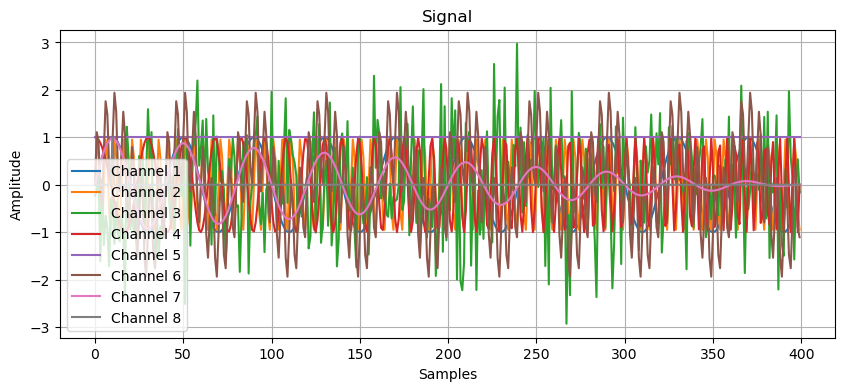

In [3]:
fig = vis.plot_signal(data, sr=n_samples)

## Step 3: Check underlying spectral

In [4]:
underspec = underlying_spectral(data, fs=n_samples)
print(underspec[0].shape, underspec[1].shape, underspec[2].shape)
underspec[1]


(201, 8) (201,) (8,)


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [5]:
N = 0
underspec_1d = underlying_spectral(data[:, N], fs=n_samples)
np.sum(underspec_1d[0] - underspec[0][:, N]), underspec_1d[2] - underspec[2][N]

(0.0, 0.0)

## Check spectral centroid

In [6]:
data_centroid = spectral_centroid(data, fs=n_samples)
data_centroid, data_centroid.shape

(array([ 10.        ,  80.        , 101.86855338,  56.85427997,
          0.        ,  45.        ,  14.07487792, 100.        ]),
 (8,))

In [7]:
data_centroid_1d = spectral_centroid(data[:, 0], fs=n_samples)
data_centroid_1d

10.000000000002293

## Check rollof

In [8]:
data_rollof = spectral_rolloff(data, fs=n_samples)
data_rollof

array([ 10.,  80., 192.,  99.,   0.,  80.,  38., 190.])

In [9]:
data_rollof_1d = spectral_rolloff(data[:, 0], fs=n_samples)
data_rollof_1d

10.0

## Check spread

In [10]:
data_spread = spectral_spread(data, fs=n_samples)
data_spread

array([1.77612315e-05, 2.35892405e-05, 5.94889011e+01, 2.88004215e+01,
       0.00000000e+00, 3.50000000e+01, 1.99568313e+01, 5.80229840e+01])

In [11]:
data_spread_1d = spectral_spread(data[:, 0], fs=n_samples)
data_spread_1d

1.776123151778882e-05

## Check skewness

In [12]:
data_skewness = spectral_skewness(data, fs=n_samples)
data_skewness

/home/kirk/PycharmProjects/crossai-ts/caits/fe/_spectral.py:109: RuntimeWarning: invalid value encountered in divide
  return (np.sum((tmp ** 3).T * magnitudes, axis=axis) /


array([ 8.52467387e+06,  2.01020394e+06, -2.25722897e-02,  2.67647945e-01,
                   nan,  8.05878838e-13,  5.49986703e+00,  0.00000000e+00])

In [13]:
data_skewness_1d = spectral_skewness(data[:, 7], fs=n_samples)
data_skewness_1d

0.0

## Check kurtosis

In [14]:
data_kurtosis = spectral_kurtosis(data, fs=n_samples)
data_kurtosis

/home/kirk/PycharmProjects/crossai-ts/caits/fe/_spectral.py:138: RuntimeWarning: invalid value encountered in divide
  return (np.sum((tmp ** 4).T * magnitudes, axis=axis)


array([7.62624451e+13, 1.16785164e+13, 1.75138932e+00, 2.62866945e+00,
                  nan, 1.00000000e+00, 3.85516403e+01, 1.79994059e+00])

In [15]:
data_kurtosis_1d = spectral_kurtosis(data[:, 2], fs=n_samples)
data_kurtosis_1d

1.7513893214321827

## Check bandwidth

In [16]:
data_bandwidth = spectral_bandwidth(data, fs=n_samples)
data_bandwidth

(200,) (200, 8)


array([2.95383819e-13, 9.58659686e-13, 6.05840876e+01, 2.56956007e+01,
       0.00000000e+00, 3.50000000e+01, 1.79638919e+00, 5.77343052e+01])

In [17]:
data_bandwidth_1d = spectral_bandwidth(data[:, 5], fs=n_samples)
data_bandwidth_1d

(200,) (200,)


35.0

## Check flatness

In [18]:
data_flatness = spectral_flatness(data, fs=n_samples)
data_flatness

/home/kirk/PycharmProjects/crossai-ts/caits/fe/_spectral.py:286: RuntimeWarning: divide by zero encountered in divide
  return gmean / amean


array([6.99593131e-15, 6.99593131e-15, 5.76052378e-01, 9.65794706e-06,
                  inf, 6.08744465e-15, 8.54488765e-11, 4.20442666e-02])

In [19]:
data_flatness_1d = spectral_flatness(data[:, 7], fs=n_samples)
data_flatness_1d

0.04204426662443714

## Check std

In [20]:
data_std = spectral_std(data, fs=n_samples)
data_std

array([2.48753109e-02, 2.48753109e-02, 5.69370183e-03, 4.55764636e-03,
       0.00000000e+00, 3.50017768e-02, 6.38846865e-03, 3.24731550e-07])

In [21]:
data_std_1d = spectral_std(data[:, -1], fs=n_samples)
data_std_1d

3.2473155044306587e-07

## Check slope

In [22]:
data_slope = spectral_slope(data, fs=n_samples)
data_slope

array([-2.67164179e-02, -5.82089552e-03,  9.07358674e-03, -1.27248397e-01,
       -5.94029851e-02, -3.25373134e-02, -4.21312410e-02,  3.28924284e-20])

In [23]:
data_slope_1d = spectral_slope(data[:, 7], fs=n_samples)
data_slope_1d

3.289242841613335e-20

## Check decrease

In [24]:
data_decrease = spectral_decrease(data, fs=n_samples)
data_decrease

array([ 1.10494170e-01,  1.25941396e-02,  1.34043942e+00,  4.50488174e-02,
       -8.19322148e+21,  6.15441548e-02,  6.14886574e-02, -1.63920015e-18])

In [25]:
data_decrease_1d = spectral_decrease(data[:, 0], fs=n_samples)
data_decrease_1d

0.11049416990560523

## Check spectral values

In [26]:
data_spectral_values = spectral_values(data, fs=n_samples)
data_spectral_values

(200,) (200, 8)


{'spectral_centroid': array([ 10.        ,  80.        , 101.86855338,  56.85427997,
          0.        ,  45.        ,  14.07487792, 100.        ]),
 'spectral_rolloff': array([ 10.,  80., 192.,  99.,   0.,  80.,  38., 190.]),
 'spectral_spread': array([1.77612315e-05, 2.35892405e-05, 5.94889011e+01, 2.88004215e+01,
        0.00000000e+00, 3.50000000e+01, 1.99568313e+01, 5.80229840e+01]),
 'spectral_skewness': array([ 8.52467387e+06,  2.01020394e+06, -2.25722897e-02,  2.67647945e-01,
                    nan,  8.05878838e-13,  5.49986703e+00,  0.00000000e+00]),
 'spectral_kurtosis': array([7.62624451e+13, 1.16785164e+13, 1.75138932e+00, 2.62866945e+00,
                   nan, 1.00000000e+00, 3.85516403e+01, 1.79994059e+00]),
 'spectral_bandwidth': array([2.95383819e-13, 9.58659686e-13, 6.05840876e+01, 2.56956007e+01,
        0.00000000e+00, 3.50000000e+01, 1.79638919e+00, 5.77343052e+01]),
 'spectral_flatness': array([6.99593131e-15, 6.99593131e-15, 5.76052378e-01, 9.65794706e-06,
   

In [27]:
data_spectral_values_1d = spectral_values(data[:, 0], fs=n_samples)
data_spectral_values_1d

(200,) (200,)


{'spectral_centroid': 10.000000000002293,
 'spectral_rolloff': 10.0,
 'spectral_spread': 1.776123151778882e-05,
 'spectral_skewness': 8524673.868706489,
 'spectral_kurtosis': 76262445138358.25,
 'spectral_bandwidth': 2.953838190279594e-13,
 'spectral_flatness': 6.995931314056136e-15,
 'spectral_std': 0.024875310943330207,
 'spectral_slope': -0.02671641791044769,
 'spectral_decrease': 0.11049416990560523}